# CS313: Final Project

## Read data

In [1]:
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00


In [2]:
!pip install plotly==5.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [3]:
!pip install holoviews

In [4]:
!pip install folium

In [5]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.8 MB/s eta 0:00:00


In [6]:
import polars as pl
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date, timedelta
import seaborn as sns
from pandas_datareader import data as pdr
from pandas_datareader import wb
import yfinance as yf
import folium
import holoviews
import plotly.express as px
import plotly.graph_objects as go
import kaleido
import warnings
warnings.filterwarnings('ignore')

In [7]:
%cd '/content/drive/MyDrive/Đồ án/CS313/Đồ án/Dataset + Code/Thành Long'

/content/drive/MyDrive/Đồ án/CS313/Đồ án/Dataset + Code/Thành Long


In [8]:
data_path1 = '24_Atmospheric_CO2_Concentrations.csv'
data_path2 = '25_Change_in_Mean_Sea_Levels.csv'

##1. Load data by Pandas

In [9]:
CO2_Concetrations = pd.read_csv(data_path1)
SeaLevels_Change = pd.read_csv(data_path2)

##2. CO2 Concentrations

###2.1. Overall: This indicator presents the concentration of carbon dioxide in the atmosphere, on a monthly and yearly basis, dating back to 1958.

In [10]:
CO2_Concetrations

,Country,ISO2,ISO3,Indicator,Unit,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86
...,...,...,...,...,...,...,...,...,...,...
1565,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M11,0.72
1566,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M12,421.86
1567,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023M12,0.68
1568,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2024M01,422.80


In [11]:
CO2_Concetrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1570 non-null   object 
 1   ISO2                 0 non-null      float64
 2   ISO3                 1570 non-null   object 
 3   Indicator            1570 non-null   object 
 4   Unit                 1570 non-null   object 
 5   CTS Code             1570 non-null   object 
 6   CTS Name             1570 non-null   object 
 7   CTS Full Descriptor  1570 non-null   object 
 8   Date                 1570 non-null   object 
 9   Value                1570 non-null   float64
dtypes: float64(2), object(8)
memory usage: 122.8+ KB


###2.2. Các thông tin về bộ dữ liệu

In [12]:
# Check NaN value
CO2_Concetrations.isna().sum()

Country                   0
ISO2                   1570
ISO3                      0
Indicator                 0
Unit                      0
CTS Code                  0
CTS Name                  0
CTS Full Descriptor       0
Date                      0
Value                     0
dtype: int64

In [13]:
# Check all different value in each column
for item in CO2_Concetrations.columns:
  print (item, CO2_Concetrations[item].unique())

Country ['World']
ISO2 [nan]
ISO3 ['WLD']
Indicator ['Monthly Atmospheric Carbon Dioxide Concentrations'
 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']
Unit ['Parts Per Million' 'Percent']
CTS Code ['ECCA']
CTS Name ['Atmospheric Carbon Dioxide Concentrations']
CTS Full Descriptor ['Environment, Climate Change, Climate and Weather, Atmospheric Carbon Dioxide Concentrations']
Date ['1958M03' '1958M04' '1958M05' '1958M06' '1958M07' '1958M08' '1958M09'
 '1958M10' '1958M11' '1958M12' '1959M01' '1959M02' '1959M03' '1959M04'
 '1959M05' '1959M06' '1959M07' '1959M08' '1959M09' '1959M10' '1959M11'
 '1959M12' '1960M01' '1960M02' '1960M03' '1960M04' '1960M05' '1960M06'
 '1960M07' '1960M08' '1960M09' '1960M10' '1960M11' '1960M12' '1961M01'
 '1961M02' '1961M03' '1961M04' '1961M05' '1961M06' '1961M07' '1961M08'
 '1961M09' '1961M10' '1961M11' '1961M12' '1962M01' '1962M02' '1962M03'
 '1962M04' '1962M05' '1962M06' '1962M07' '1962M08' '1962M09' '1962M10'
 '1962M11'

###2.3. Convert date time data

In [14]:
def convert_date (df):
  i = 0
  data_get = list(df['Date'])
  data_return = list()

  for item in data_get:
    data_date = str(item).replace('M','-')
    try:
      dataObject = dt.strptime(data_date, '%Y-%m')
      data_return.append(dataObject)
    except ValueError:
      data_return.append(None)

  df['Date'] = data_return
  return df

CO2_Concetrations = convert_date(CO2_Concetrations)
CO2_Concetrations

,Country,ISO2,ISO3,Indicator,Unit,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-03-01,315.70
1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-04-01,317.45
2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-05-01,317.51
3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-06-01,317.24
4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958-07-01,315.86
...,...,...,...,...,...,...,...,...,...,...
1565,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-11-01,0.72
1566,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-12-01,421.86
1567,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2023-12-01,0.68
1568,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2024-01-01,422.80


In [15]:
# Drop columns 'IS02', 'Country', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'

new_CO2_Concetrations = CO2_Concetrations.drop(columns=['Country', 'ISO2', 'ISO3', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'])
new_CO2_Concetrations

,Indicator,Unit,Date,Value
0,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,1958-03-01,315.70
1,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,1958-04-01,317.45
2,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,1958-05-01,317.51
3,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,1958-06-01,317.24
4,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,1958-07-01,315.86
...,...,...,...,...
1565,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,2023-11-01,0.72
1566,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,2023-12-01,421.86
1567,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,2023-12-01,0.68
1568,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,2024-01-01,422.80


###2.4. Split data based on 2 different units: Parts Per Million and Percent

In [16]:
# Based on Unit, split dataframe into 2 different df
CO2_Concetrations_Parts = new_CO2_Concetrations[new_CO2_Concetrations['Unit'] == 'Parts Per Million']
CO2_Concetrations_Percent = new_CO2_Concetrations[new_CO2_Concetrations['Unit'] == 'Percent']

###2.5. Plot of Monthly Atmospheric Carbon Dioxide Concentrations

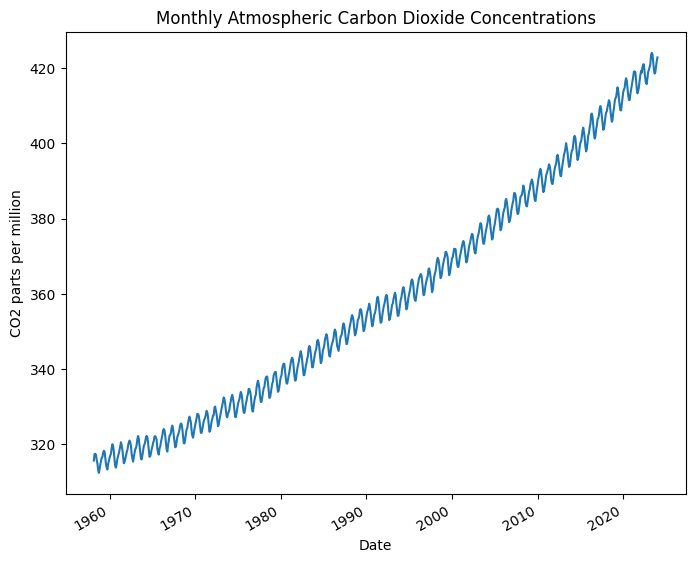

In [17]:
plt.figure(figsize = (8,6))
plt.plot(CO2_Concetrations_Parts['Date'], CO2_Concetrations_Parts['Value'])
plt.xticks(rotation=30, ha='right')
plt.title('Monthly Atmospheric Carbon Dioxide Concentrations')
plt.xlabel('Date')
plt.ylabel('CO2 parts per million')
# plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2023-01-01'))
plt.show()

# plt.savefig('./graph/Monthly_Atmospheric_Carbon_Dioxide_Concentrations.png')

In [18]:
# Use Plotly
fig = px.line(CO2_Concetrations_Parts, x="Date", y="Value", title="Monthly Atmospheric Carbon Dioxide Concentrations").update_layout(
    xaxis_title="Date", yaxis_title="CO2 parts per million"
)
# fig.write_image("./graph/Monthly_Atmospheric_Carbon_Dioxide_Concentrations.svg")
fig.show()

###2.6. Plot of Yearly Atmospheric Carbon Dioxide Concentrations

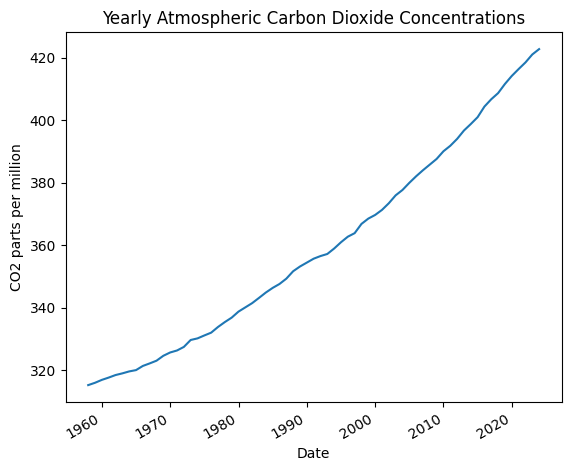

In [19]:
CO2_Concetrations_Parts.index = pd.to_datetime(CO2_Concetrations_Parts['Date'],format='%Y/%m/%d %I:%M%p')
result = CO2_Concetrations_Parts.groupby(by=[CO2_Concetrations_Parts.index.year]).mean('Value')

# plt.figure(figsize = (15,15))
result['Value'].plot(title='Yearly Atmospheric Carbon Dioxide Concentrations', xlabel='Date', ylabel = 'CO2 parts per million')
plt.xticks(rotation=30, ha='right')
plt.show()

# plt.savefig('./graph/Yearly_Atmospheric_Carbon_Dioxide_Concentrations.png')

In [20]:
# Use Plotly
fig = px.line(result['Value'], title="Yearly Atmospheric Carbon Dioxide Concentrations").update_layout(
    xaxis_title="Date", yaxis_title="CO2 parts per million"
)
fig.write_image("./graph/Yearly_Atmospheric_Carbon_Dioxide_Concentrations.svg")
fig.show()

###2.8. Plot of Monthly Atmospheric Carbon Dioxide Concentrations - Year on Year Growth Rate

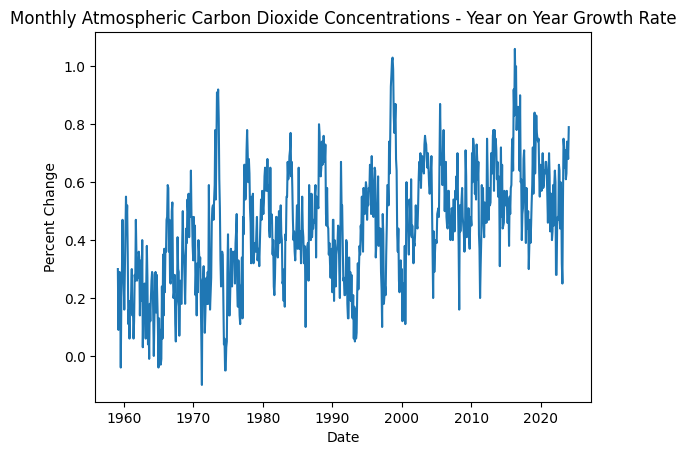

In [21]:
plt.plot(CO2_Concetrations_Percent['Date'], CO2_Concetrations_Percent['Value'])
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Monthly Atmospheric Carbon Dioxide Concentrations - Year on Year Growth Rate')
plt.show()
# plt.savefig('./graph/C02_Concentration_Year_on_Year_Growth_Rate.png')

In [22]:
# Use Plotly
fig = px.line(CO2_Concetrations_Percent, x="Date", y="Value", title="Monthly Atmospheric Carbon Dioxide Concentrations - Year on Year Growth Rate").update_layout(
    xaxis_title="Date", yaxis_title="Percent Change"
)
fig.write_image("./graph/C02_Concentration_Year_on_Year_Growth_Rate.svg")
fig.show()

###2.9. Plot of Percent Change of CO2 Concetrations over years

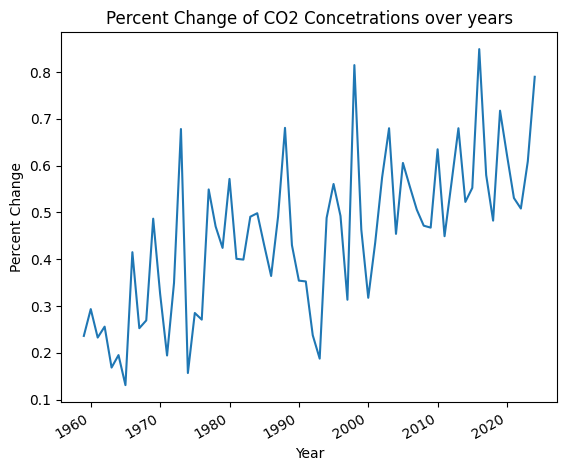

In [23]:
CO2_Concetrations_Percent.index = pd.to_datetime(CO2_Concetrations_Percent['Date'],format='%Y/%m/%d %I:%M%p')
result2 = CO2_Concetrations_Percent.groupby(by=[CO2_Concetrations_Percent.index.year]).mean('Value')

result2['Value'].plot(title='Percent Change of CO2 Concetrations over years', xlabel='Year', ylabel = 'Percent Change')
plt.xticks(rotation=30, ha='right')
plt.show()
# plt.savefig('./graph/CO2_Change_Percent_Per_Year.png')

In [24]:
# Use Plotly
fig = px.line(result2['Value'], title="Percent Change of CO2 Concetrations over years").update_layout(
    xaxis_title="Date", yaxis_title="Percent Change"
)
fig.write_image("./graph/CO2_Change_Percent_Per_Year.svg")
fig.show()

## 3. Sea Level Change

###3.1. Overall

- Based on Oxford University Dictionary, Sea Level is the level of the sea's surface, which use to recognize the height of determined lands or hills, mountains,...
- The dataset show the rise of global sea levels, based on measurements from satellite radar altimeters. There are 4 satellite altimeters included TOPEX/Poseidon, Jason-1, Jason-2, Jason-3.
- Different source of Sea Level:
  + https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries.php
  + https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level#:~:text=Global%20mean%20sea%20level%20has,of%20seawater%20as%20it%20warms.
  

In [25]:
SeaLevels_Change

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66
...,...,...,...,...,...,...,...,...,...,...,...,...
39602,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",South China,D02/25/2024,4.02
39603,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Southern Ocean,D02/25/2024,3.11
39604,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Tropics,D02/25/2024,3.20
39605,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D02/25/2024,3.14


###3.2. Data info

In [26]:
SeaLevels_Change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              39607 non-null  object 
 1   ISO2                 0 non-null      float64
 2   ISO3                 39607 non-null  object 
 3   Indicator            39607 non-null  object 
 4   Unit                 39607 non-null  object 
 5   Source               39607 non-null  object 
 6   CTS Code             39607 non-null  object 
 7   CTS Name             39607 non-null  object 
 8   CTS Full Descriptor  39607 non-null  object 
 9   Measure              39607 non-null  object 
 10  Date                 39607 non-null  object 
 11  Value                39607 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.6+ MB


In [27]:
# Show different indicator of dataset
SeaLevels_Change['Indicator'].unique()

array(['Change in mean sea level: Sea level: TOPEX.Poseidon',
       'Change in mean sea level: Sea level: Jason.1',
       'Change in mean sea level: Sea level: Jason.2',
       'Change in mean sea level: Sea level: Jason.3',
       'Change in mean sea level: Sea level: Sentinel-6MF',
       'Change in mean sea level: Sea level: Trend'], dtype=object)

In [28]:
# Show the different ocean to measure sea level change
SeaLevels_Change['Measure'].unique()

array(['Sea Okhotsk', 'Adriatic Sea', 'Andaman Sea', 'Arabian Sea',
       'Atlantic Ocean', 'Baltic Sea', 'Bay Bengal', 'Bering Sea',
       'Caribbean Sea', 'Gulf Mexico', 'Indian Ocean', 'Indonesian',
       'Mediterranean', 'Nino', 'North Pacific', 'North Sea',
       'Pacific Ocean', 'Sea Japan', 'South China', 'Southern Ocean',
       'Tropics', 'World', 'Yellow Sea', 'North Atlantic', 'Persian Gulf'],
      dtype=object)

###3.3. Convert datetime datatype in column 'Date' and change info in column 'Indicator'

In [29]:
def convert_data (df):
  columns = df.columns
  i = 0
  for i in range (len(df.columns)):
      if columns[i] == 'Date':
        # Get list of datetime:
        data_get = list (df['Date'])
        data_return = list ()
        format_date = '%m/%d/%Y'
        for item in data_get:
          datetime_data = item.split('D')[1]
          try:
            dateObject = dt.strptime(datetime_data, format_date)
            data_return.append(dateObject)
          except ValueError:
            continue
      if columns[i] == 'Indicator':
        get_str = list(df['Indicator'])
        str_return = list()
        for item in get_str:
          str_return.append(item.split(':')[2].split(' ')[1])
  df['Date'] = data_return
  df['Indicator'] = str_return
  return df

In [30]:
SeaLevels_Change = convert_data(SeaLevels_Change)
SeaLevels_Change

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,World,NaN,WLD,TOPEX.Poseidon,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,1992-12-16,10.11
1,World,NaN,WLD,TOPEX.Poseidon,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,1992-12-17,32.73
2,World,NaN,WLD,TOPEX.Poseidon,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,1992-12-17,-14.88
3,World,NaN,WLD,TOPEX.Poseidon,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,1992-12-17,-9.76
4,World,NaN,WLD,TOPEX.Poseidon,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,1992-12-17,-13.66
...,...,...,...,...,...,...,...,...,...,...,...,...
39602,World,NaN,WLD,Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",South China,2024-02-25,4.02
39603,World,NaN,WLD,Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Southern Ocean,2024-02-25,3.11
39604,World,NaN,WLD,Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Tropics,2024-02-25,3.20
39605,World,NaN,WLD,Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,2024-02-25,3.14


In [31]:
new_SeaLevels_Change = SeaLevels_Change.drop(columns = ['Country', 'ISO2', 'ISO3', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'])
new_SeaLevels_Change

,Indicator,Unit,Measure,Date,Value
0,TOPEX.Poseidon,Millimeters,Sea Okhotsk,1992-12-16,10.11
1,TOPEX.Poseidon,Millimeters,Adriatic Sea,1992-12-17,32.73
2,TOPEX.Poseidon,Millimeters,Andaman Sea,1992-12-17,-14.88
3,TOPEX.Poseidon,Millimeters,Arabian Sea,1992-12-17,-9.76
4,TOPEX.Poseidon,Millimeters,Atlantic Ocean,1992-12-17,-13.66
...,...,...,...,...,...
39602,Trend,Millimeters,South China,2024-02-25,4.02
39603,Trend,Millimeters,Southern Ocean,2024-02-25,3.11
39604,Trend,Millimeters,Tropics,2024-02-25,3.20
39605,Trend,Millimeters,World,2024-02-25,3.14


###3.4. Mean Sea Levels Changing in different Ocean, Sea

In [32]:
new_SeaLevels_Change

,Indicator,Unit,Measure,Date,Value
0,TOPEX.Poseidon,Millimeters,Sea Okhotsk,1992-12-16,10.11
1,TOPEX.Poseidon,Millimeters,Adriatic Sea,1992-12-17,32.73
2,TOPEX.Poseidon,Millimeters,Andaman Sea,1992-12-17,-14.88
3,TOPEX.Poseidon,Millimeters,Arabian Sea,1992-12-17,-9.76
4,TOPEX.Poseidon,Millimeters,Atlantic Ocean,1992-12-17,-13.66
...,...,...,...,...,...
39602,Trend,Millimeters,South China,2024-02-25,4.02
39603,Trend,Millimeters,Southern Ocean,2024-02-25,3.11
39604,Trend,Millimeters,Tropics,2024-02-25,3.20
39605,Trend,Millimeters,World,2024-02-25,3.14


In [33]:
# Get ocean in world
ocean = new_SeaLevels_Change['Measure'].unique()

In [34]:
def plot_sea_level_change_byOcean_ploty(ocean_name):
  fig = go.Figure()
  df_sorted = SeaLevels_Change[SeaLevels_Change['Indicator'] != 'Trend']
  df_sorted = df_sorted.sort_values('Date', ascending=True)[df_sorted['Measure'] == ocean_name]

  for i, (series_name, series) in enumerate(df_sorted.groupby('Indicator')):
    fig.add_trace(go.Scatter(x=series['Date'], y=series['Value'],
                      mode='lines',
                      name=series_name))
  # Edit the layout
  title_name = f'Mean Sea Levels Changing - {ocean_name}'
  fig.update_layout(title=title_name,
                    xaxis_title='Date',
                    yaxis_title='Change in Sea Level [mm]')

  fig_name = f'Sea_Levels_Changing_in_Ocean_{ocean_name}'
  fig.write_image("./graph/" + fig_name + ".svg")
  fig.show()

####3.4.1. Sea Okhotsk

In [62]:
plot_sea_level_change_byOcean_ploty(ocean[0])

####3.4.2. Adriactic Sea

In [36]:
plot_sea_level_change_byOcean_ploty(ocean[1])

#### 3.4.3. Andaman Sea

In [37]:
plot_sea_level_change_byOcean_ploty(ocean[2])

#### 3.4.4. Arabian Sea

In [38]:
plot_sea_level_change_byOcean_ploty(ocean[3])

#### 3.4.5. Atlantic Ocean

In [39]:
plot_sea_level_change_byOcean_ploty(ocean[4])

#### 3.4.6. Baltic Sea

In [40]:
plot_sea_level_change_byOcean_ploty(ocean[5])

#### 3.4.7. Bay Bengal

In [41]:
plot_sea_level_change_byOcean_ploty(ocean[6])

#### 3.4.8. Bering Sea

In [42]:
plot_sea_level_change_byOcean_ploty(ocean[7])

#### 3.4.9. Caribbean Sea

In [43]:
plot_sea_level_change_byOcean_ploty(ocean[8])

#### 3.4.10. Gulf Mexico

In [44]:
plot_sea_level_change_byOcean_ploty(ocean[9])

#### 3.4.11. Indian Ocean

In [45]:
plot_sea_level_change_byOcean_ploty(ocean[10])

#### 3.4.12. Indonesian

In [46]:
plot_sea_level_change_byOcean_ploty(ocean[11])

#### 3.4.13. Mediterranean

In [47]:
plot_sea_level_change_byOcean_ploty(ocean[12])

#### 3.4.14. Nino

In [48]:
plot_sea_level_change_byOcean_ploty(ocean[13])

#### 3.4.15. North Pacific

In [49]:
plot_sea_level_change_byOcean_ploty(ocean[14])

#### 3.4.16. North Sea

In [50]:
plot_sea_level_change_byOcean_ploty(ocean[15])

#### 3.4.17. Pacific Ocean

In [51]:
plot_sea_level_change_byOcean_ploty(ocean[16])

#### 3.4.18. Sea Japan

In [52]:
plot_sea_level_change_byOcean_ploty(ocean[17])

#### 3.4.19. South China

In [53]:
plot_sea_level_change_byOcean_ploty(ocean[18])

#### 3.4.20. Southern Ocean

In [54]:
plot_sea_level_change_byOcean_ploty(ocean[19])

#### 3.4.21. Tropics

In [55]:
plot_sea_level_change_byOcean_ploty(ocean[20])

#### 3.4.22. Yellow Sea

In [56]:
plot_sea_level_change_byOcean_ploty(ocean[22])

#### 3.4.23. North Atlantic

In [57]:
plot_sea_level_change_byOcean_ploty(ocean[23])

#### 3.4.24. Persian Gulf

In [58]:
plot_sea_level_change_byOcean_ploty(ocean[24])

### 3.5. Mean Sea Levels Changing in World

In [59]:
plot_sea_level_change_byOcean_ploty(ocean[21])

###3.6. Trend in World Sea Levels Change - Over years

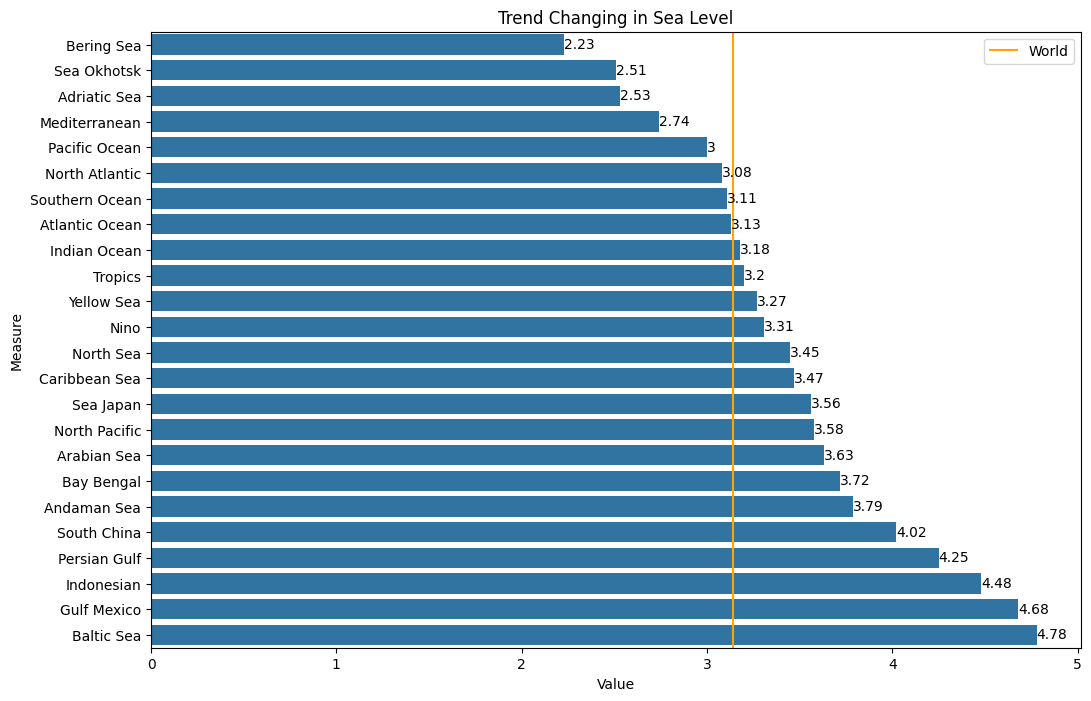

In [60]:
# Get the average sea level change by each ocean
yearly_sea_level = new_SeaLevels_Change[new_SeaLevels_Change['Indicator'] == 'Trend']
world_sea_level = yearly_sea_level[yearly_sea_level['Measure']=='World']

# sort df by Count column
yearly_sea_level = yearly_sea_level.sort_values(['Value'])[yearly_sea_level['Measure']!='World']

# Plot the Sea Level Change
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(data = yearly_sea_level, y = 'Measure', x = 'Value')
ax.bar_label(ax.containers[0], fontsize=10)
plt.axvline(x = float(world_sea_level['Value']), color = 'orange', label = 'World')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.title('Trend Changing in Sea Level')

# plt.tight_layout()
plt.show()


# ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

### 3.7. Visualize data by Map

In [61]:
import folium
import pandas as pd

# Sample data for demonstration
data = {
    'Location': ['Sea Okhotsk', 'Adriatic Sea', 'Andaman Sea', 'Arabian Sea', 'Atlantic Ocean',
                 'Baltic Sea', 'Bay Bengal', 'Bering Sea', 'Caribbean Sea', 'Gulf Mexico',
                 'Indian Ocean', 'Indonesian', 'Mediterranean', 'Nino', 'North Pacific',
                 'North Sea', 'Pacific Ocean', 'Sea Japan', 'South China', 'Southern Ocean',
                 'Tropics', 'Yellow Sea', 'North Atlantic', 'Persian Gulf'],
    'Latitude': [53.5, 43.5, 10.5, 17.5, 0, 56, 18, 57.5, 20, 24, -10, -5, 35, -5, 20, 60, 0, 35, 20, 60, -60, 0, 38, 30],
    'Longitude': [143, 12, 95, 60, -30, 20, 90, -170, -75, -87, 70, 120, 20, -80, 150, 5, -160, 140, 110, 0, -160, 0, -60, 50],
    'Sea_Level_Change': yearly_sea_level['Value'].to_numpy()}

df = pd.DataFrame(data)

# Create a Folium map centered around a location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each ocean/sea region
for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], fill_color='YlOrRd',
                  popup=f"Sea Level Change: {row['Sea_Level_Change']} Millimeters",
                  tooltip=row['Location']).add_to(m)

# Display the map
m